In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Tensorflow Version 2.3.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.head()

0  ...                                                  5
0  0  ...  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1  0  ...  is upset that he can't update his Facebook by ...
2  0  ...  @Kenichan I dived many times for the ball. Man...
3  0  ...    my whole body feels itchy and like its on fire 
4  0  ...  @nationwideclass no, it's not behaving at all....

[5 rows x 6 columns]

In [4]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

sentiment  ...                                               text
0          0  ...  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  ...  is upset that he can't update his Facebook by ...
2          0  ...  @Kenichan I dived many times for the ball. Man...
3          0  ...    my whole body feels itchy and like its on fire 
4          0  ...  @nationwideclass no, it's not behaving at all....

[5 rows x 6 columns]

In [5]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)
df.head()

sentiment                                               text
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  is upset that he can't update his Facebook by ...
2          0  @Kenichan I dived many times for the ball. Man...
3          0    my whole body feels itchy and like its on fire 
4          0  @nationwideclass no, it's not behaving at all....

In [6]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

sentiment                                               text
0  Negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1  Negative  is upset that he can't update his Facebook by ...
2  Negative  @Kenichan I dived many times for the ball. Man...
3  Negative    my whole body feels itchy and like its on fire 
4  Negative  @nationwideclass no, it's not behaving at all....

Text(0.5, 1.0, 'Sentiment Data Distribution')

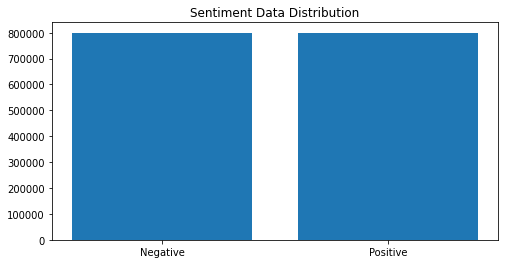

In [7]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [8]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

sentiment                                               text
140021   Negative                          Queues everywhere I turn 
397328   Negative  Starting to make my way back to Leeds. Feeling...
698044   Negative  @jesssaywhattt I knowwww  she yelled at me say...
159822   Negative  The telephone wires are getting overhauled. Ho...
583771   Negative  @MikeMilan215 blah dont say that, i like calli...
1243305  Positive          @snjehan Thank you.  My office in SS2 PJ 
478777   Negative  wow another follower. if only it were this eas...
1488208  Positive   Gonna go watch Sophia while ronnie hits the gym 
1297380  Positive  Shopping.....er Browsing the new Tiffany silve...
606979   Negative  @sanuzis Let's go 3/3! Banks, auto makers, and...

In [9]:
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)]
random_idx_list

[1489718,
 297201,
 100206,
 1484200,
 633782,
 513962,
 93701,
 24820,
 49815,
 1092237]

In [10]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [11]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [12]:
df.text = df.text.apply(lambda x: preprocess(x))

In [13]:
df.text 

0               awww bummer shoulda got david carr third day
1          upset update facebook texting might cry result...
2          dived many times ball managed save 50 rest go ...
3                           whole body feels itchy like fire
4                                           behaving mad see
                                 ...                        
1599995                        woke school best feeling ever
1599996             thewdb com cool hear old walt interviews
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1600000, dtype: object

In [14]:
df

sentiment                                               text
0        Negative       awww bummer shoulda got david carr third day
1        Negative  upset update facebook texting might cry result...
2        Negative  dived many times ball managed save 50 rest go ...
3        Negative                   whole body feels itchy like fire
4        Negative                                   behaving mad see
...           ...                                                ...
1599995  Positive                      woke school best feeling ever
1599996  Positive           thewdb com cool hear old walt interviews
1599997  Positive                    ready mojo makeover ask details
1599998  Positive  happy 38th birthday boo alll time tupac amaru ...
1599999  Positive  happy charitytuesday thenspcc sparkscharity sp...

[1600000 rows x 2 columns]

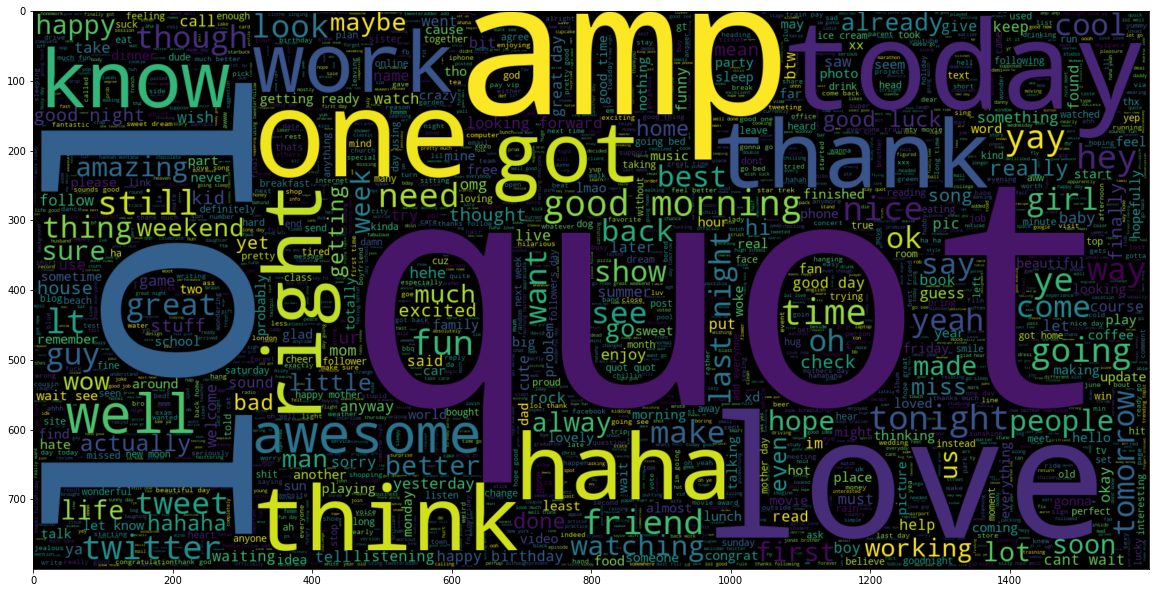

In [15]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

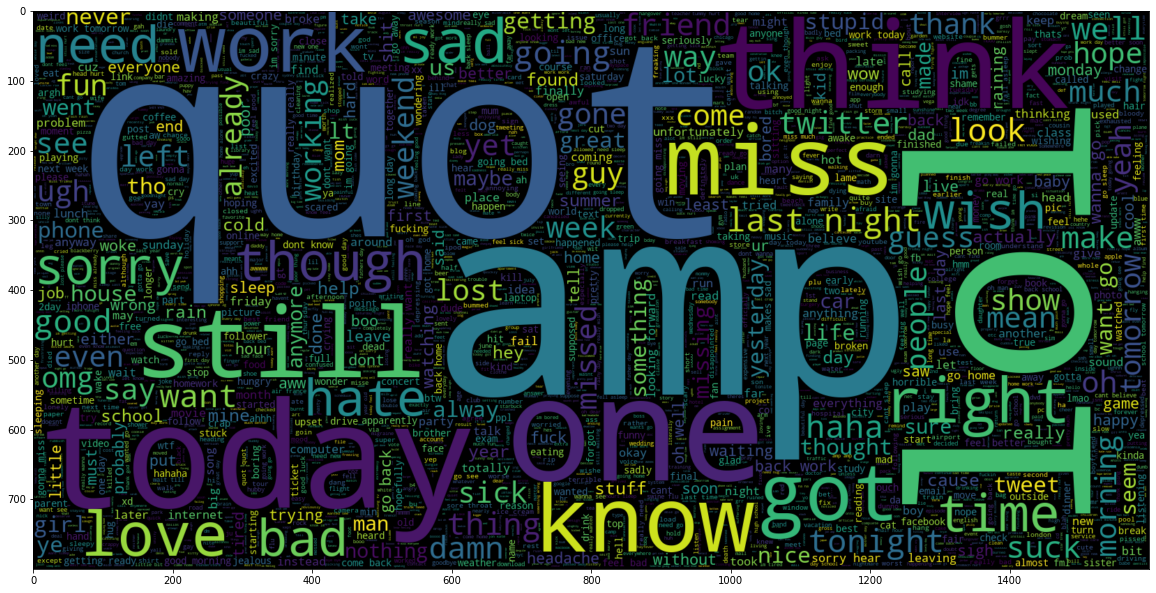

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 20000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [16]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [17]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [18]:
train_data.head(10)

sentiment                                               text
23786    Negative                                       need friends
182699   Negative                          im trying call impossible
476661   Negative  good pace going 3k 13 min missed 5k turn ended...
1181490  Positive               u gonna shows ny soon luv see u live
878773   Positive  hell yea get em tattoos ink free wish parents ...
130866   Negative  yeah need 2 see ur mom calls back first rememb...
1235876  Positive                           sounds like cup tea sign
717314   Negative                               tired want sleep wtf
969880   Positive                                       amazing wish
748698   Negative  thank god wkrn abc affiliate nashville back mi...

In [19]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)
len(train_data.text)

Vocabulary Size : 290575


1280000

In [ ]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


x_train[:3,:]

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


In [ ]:
y_train[:5,:]

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2020-09-02 09:13:37--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-09-02 09:13:37--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-09-02 09:13:37--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [ ]:
!unzip "/content/glove.6B.zip.1" -d "/content/drive/My Drive/"

Archive:  /content/glove.6B.zip.1
  inflating: /content/drive/My Drive/glove.6B.50d.txt  
  inflating: /content/drive/My Drive/glove.6B.100d.txt  
  inflating: /content/drive/My Drive/glove.6B.200d.txt  
  inflating: /content/drive/My Drive/glove.6B.300d.txt  


In [ ]:
GLOVE_EMB = '/content/drive/My Drive/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '/content/drive/My Drive/best_model.hdf5'

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
word_index.items()

dict_items([('good', 1), ('day', 2), ('get', 3), ('like', 4), ('go', 5), ('quot', 6), ('today', 7), ('work', 8), ('love', 9), ('going', 10), ('got', 11), ('lol', 12), ('time', 13), ('back', 14), ('u', 15), ('one', 16), ('know', 17), ('im', 18), ('really', 19), ('amp', 20), ('see', 21), ('night', 22), ('still', 23), ('2', 24), ('well', 25), ('new', 26), ('want', 27), ('think', 28), ('home', 29), ('thanks', 30), ('oh', 31), ('much', 32), ('miss', 33), ('need', 34), ('last', 35), ('morning', 36), ('hope', 37), ('tomorrow', 38), ('great', 39), ('twitter', 40), ('3', 41), ('haha', 42), ('feel', 43), ('sad', 44), ('fun', 45), ('wish', 46), ('right', 47), ('sleep', 48), ('bad', 49), ('would', 50), ('happy', 51), ('sorry', 52), ('tonight', 53), ('come', 54), ('make', 55), ('getting', 56), ('way', 57), ('though', 58), ('gonna', 59), ('nice', 60), ('better', 61), ('watching', 62), ('yeah', 63), ('wait', 64), ('bed', 65), ('could', 66), ('week', 67), ('people', 68), ('school', 69), ('hate', 70), 

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [ ]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on CPU...


In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=1,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

1250/1250 [==============================] - 1170s 936ms/step - loss: 0.5111 - accuracy: 0.7455 - val_loss: 0.4807 - val_accuracy: 0.7667


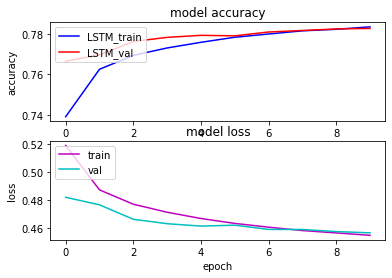

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 4s 130ms/step


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

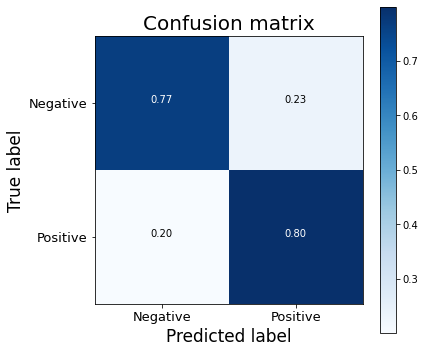

In [ ]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

In [ ]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78    160542
    Positive       0.77      0.80      0.79    159458

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

